## PRISM data not concatenating correctly for all sites

## Processing Sensor Data from Catalina Jemez CZO Green Pit 2
Marc Berghouse 9/19/2020

This array includes:
- apogee_SO110
- Vaisala_GMM220
- DecagonMPS2
- Decagon5TE

Issues:
- O2 2cm and 60cm need to be smoothed
- I'm not sure which water potential values are unrealistic

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
infile1 = "../../raw_data/Catalina-Jemez/Green_Pit2/Green_pit2_co2o2_2015.csv"
infile2 = "../../raw_data/Catalina-Jemez/Green_Pit2/Green_pit2_co2o2_2016.csv"
infile3 = "../../raw_data/Catalina-Jemez/Green_Pit2/Green_pit2_co2o2_2017.csv"
infile4 = "../../raw_data/Catalina-Jemez/Green_Pit2/Green_pit2_co2o2_2018.csv"
infile5 = "../../raw_data/Catalina-Jemez/Green_Pit2/Green_pit2_soilMTP_2015.csv"
infile6 = "../../raw_data/Catalina-Jemez/Green_Pit2/Green_pit2_soilMTP_2016.csv"
infile7 = "../../raw_data/Catalina-Jemez/Green_Pit2/Green_pit2_soilMTP_2017.csv"
infile8 = "../../raw_data/Catalina-Jemez/Green_Pit2/Green_pit2_soilMTP_2018.csv"
infile9 = "../../raw_data/Catalina-Jemez/Catalina-Jemez_Green_PRISM.csv"


df1 = pd.read_csv(infile1, na_values='NAN',  parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values='NAN',  parse_dates=[0], index_col=0) 
df3 = pd.read_csv(infile3, na_values='NAN',  parse_dates=[0], index_col=0) 
df4 = pd.read_csv(infile4, na_values='NAN',  parse_dates=[0], index_col=0) 
df5 = pd.read_csv(infile5, na_values='NAN',  parse_dates=[0], index_col=0) 
df6 = pd.read_csv(infile6, na_values='NAN',  parse_dates=[0], index_col=0) 
df7 = pd.read_csv(infile7, na_values='NAN',  parse_dates=[0], index_col=0) 
df8 = pd.read_csv(infile8, na_values='NAN',  parse_dates=[0], index_col=0) 
df9 = pd.read_csv(infile9, na_values=['NAN',-9999,-99999], skiprows=10, parse_dates=[0], index_col=0) 


C:\Users\marcb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#drop metadata rows

df1=df1.drop(['MST'])
df2=df2.drop(['MST'])
df3=df3.drop(['MST'])
df4=df4.drop(['MST'])
df5=df5.drop(['MST'])
df6=df6.drop(['MST'])
df7=df7.drop(['MST'])
df8=df8.drop(['MST'])

df4

,TempSO1(2cm),TempSO2(10cm),TempSO3(30cm),TempSO4(60cm),O2soil1(2cm),O2soil2(10cm),O2soil3(30cm),O2soil4(60cm),CO2soil1(2cm),CO2soil2(10cm),CO2soil3(30cm),CO2soil4(60cm)
TIMESTAMP,,,,,,,,,,,,
1/1/2018 0:00,-0.561,1.658,2.956,6.219,20.43,19.951,19.442,19.442,1054.644,1193.943,2058.486,2290.079
1/1/2018 0:15,-0.578,1.655,2.956,6.218,20.426,19.95,19.442,19.442,1062.87,1188.249,2053.785,2281.04
1/1/2018 0:30,-0.597,1.653,2.955,6.218,20.428,19.951,19.442,19.442,1073.718,1193.853,2032.994,2277.062
1/1/2018 0:45,-0.615,1.653,2.953,6.216,20.431,19.951,19.442,19.442,1085.107,1201.085,2051.797,2295.503
1/1/2018 1:00,-0.628,1.652,2.951,6.216,20.43,19.95,19.442,19.44,1088,1198.734,2063.729,2307.797
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2018 22:45,0.763,1.861,2.911,5.965,19.687,20.000,19.139,18.981,1680.677,1485.958,2335.927,2247.323
12/31/2018 23:00,0.762,1.861,2.909,5.964,19.687,19.999,19.139,18.992,1679.298,1486.853,2330.355,2257.334
12/31/2018 23:15,0.762,1.861,2.908,5.964,19.663,20.000,19.139,18.997,1668.338,1489.203,2340.489,2276.750


In [3]:
#df9=df9.loc[0:4]
df6

,WP1(10cm),WP2(30cm),TempMPS1(10cm),TempMPS2(30cm),VWC1(10cm),VWC2(30cm),VWC3(60cm),VWC4(135cm),EC1(10cm),EC2(30cm),EC3(60cm),EC4(135cm),Temp5TE1(10cm),Temp5TE2(30cm),Temp5TE3(60cm),Temp5TE4(135cm)
TIMESTAMP,,,,,,,,,,,,,,,,
1/1/2016 0:00,-16.8,-18.8,1,2.6,0.174,0.099,0.055,0.088,0.04,0.04,0.08,0.34,1.2,2.1,3.6,6
1/1/2016 0:15,-16.6,-18.7,1,2.6,0.173,0.099,0.055,0.088,0.04,0.04,0.08,0.34,1.2,2.1,3.6,6
1/1/2016 0:30,-15.9,-16.7,1,2.6,0.174,0.098,0.055,0.088,0.04,0.04,0.08,0.34,1.2,2.1,3.6,6.1
1/1/2016 0:45,-16.6,-18.9,1,2.6,0.174,0.099,0.055,0.088,0.04,0.04,0.08,0.34,1.2,2.1,3.6,6.1
1/1/2016 1:00,-16.7,-18,1,2.6,0.174,0.099,0.055,0.088,0.03,0.04,0.08,0.33,1.1,2.1,3.7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2016 22:45,-19.6,-49.4,1.4,2.9,0.138,0.078,0.148,0.136,0.02,0.04,0.14,0.41,1.6,2.5,4,6.3
12/31/2016 23:00,-19.6,-49.5,1.4,2.9,0.138,0.078,0.148,0.136,0.02,0.04,0.13,0.42,1.6,2.5,4,6.3
12/31/2016 23:15,-19.6,-44.6,1.4,2.9,0.138,0.078,0.148,0.136,0.02,0.04,0.14,0.42,1.6,2.5,4,6.3


In [4]:
#Merge dataframes, rename columns, mask whole dataframe, create new columns

df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9], sort=False)

df.columns=['ApogeeTemp_2cm.deg.C', 'ApogeeTemp_10cm.deg.C', 'ApogeeTemp_30cm.deg.C', 'ApogeeTemp_60cm.deg.C', 'O2_2cm.percent.0-100','O2_10cm.percent.0-100', 'O2_30cm.percent.0-100', 'O2_60cm.percent.0-100', 'CO2_2cm.ppm', 'CO2_10cm.ppm', 'CO2_30cm.ppm', 'CO2_60cm.ppm', 'WaterPotential_10cm.kPa','WaterPotential_30cm.kPa', 'DecagonMPS6Temp_10cm.deg.C','DecagonMPS6Temp_30cm.deg.C', 'SoilMoisture_10cm.m3m3', 'SoilMoisture_30cm.m3m3', 'SoilMoisture_60cm.m3m3', 'SoilMoisture_135cm.m3m3', 'BulkEC_10cm.dS/m', 'BulkEC_30cm.dS/m', 'BulkEC_60cm.dS/m', 'BulkEC_135cm.dS/m', 'Decagon5TETemp_10cm.deg.C','Decagon5TETemp_30cm.deg.C', 'Decagon5TETemp_60cm.deg.C', 'Decagon5TETemp_135cm.deg.C', 'PRISM_precip.mm'  ]

df=df.astype(float)
df['WaterPotential_10cm.kPa']=abs(df['WaterPotential_10cm.kPa'])
df['WaterPotential_30cm.kPa']=abs(df['WaterPotential_30cm.kPa'])
df.mask(df<=-0.01, inplace=True)
#df=df.fillna(value=0)

#df['SoilMoisture_10cm.m3m3']=df['SoilMoistureA_10cm.m3m3']+df['SoilMoistureB_10cm.m3m3']
#df['SoilMoisture_60cm.m3m3']=df['SoilMoistureA_60cm.m3m3']+df['SoilMoistureB_60cm.m3m3']
#df['SoilMoisture_135cm.m3m3']=df['SoilMoistureA_135cm.m3m3']+df['SoilMoistureB_135cm.m3m3']
#df['Decagon5TETemp_10cm.deg.C']=df['Decagon5TETempA_10cm.deg.C']+df['Decagon5TETempB_10cm.deg.C']
#df['Decagon5TETemp_30cm.deg.C']=df['Decagon5TETempA_30cm.deg.C']+df['Decagon5TETempB_30cm.deg.C']
#df['Decagon5TETemp_60cm.deg.C']=df['Decagon5TETempA_60cm.deg.C']+df['Decagon5TETempB_60cm.deg.C']
#df['Decagon5TETemp_135cm.deg.C']=df['Decagon5TETempA_135cm.deg.C']+df['Decagon5TETempB_135cm.deg.C']
#df['BulkEC_10cm.dS/m']=df['BulkECA_10cm.dS/m']+df['BulkECB_10cm.dS/m']
#df['BulkEC_30cm.dS/m']=df['BulkECA_30cm.dS/m']+df['BulkECB_30cm.dS/m']
#df['BulkEC_60cm.dS/m']=df['BulkECA_60cm.dS/m']+df['BulkECB_60cm.dS/m']
#df['BulkEC_135cm.dS/m']=df['BulkECA_135cm.dS/m']+df['BulkECB_135cm.dS/m']

df

,ApogeeTemp_2cm.deg.C,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,O2_2cm.percent.0-100,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,CO2_2cm.ppm,CO2_10cm.ppm,...,SoilMoisture_135cm.m3m3,BulkEC_10cm.dS/m,BulkEC_30cm.dS/m,BulkEC_60cm.dS/m,BulkEC_135cm.dS/m,Decagon5TETemp_10cm.deg.C,Decagon5TETemp_30cm.deg.C,Decagon5TETemp_60cm.deg.C,Decagon5TETemp_135cm.deg.C,PRISM_precip.mm
10/23/2015 9:15,2.532,2.504,2.511,1.749,20.236,20.127,20.124,20.042,304.090,281.311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/23/2015 9:30,2.731,2.743,2.796,2.006,21.679,21.560,21.556,21.486,324.249,299.842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/23/2015 9:45,2.818,2.882,3.010,2.271,21.672,21.550,21.542,21.472,322.350,300.113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/23/2015 10:00,3.031,3.135,3.395,2.735,21.645,21.480,21.514,21.483,320.904,294.509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/23/2015 10:15,3.698,3.800,3.927,4.075,44.575,19.753,21.519,21.485,314.396,294.328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.25
2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.33
2018-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.19
2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [5]:
#More corrections to whole DataFrame

#df.mask(df==0.000, inplace=True)
#df

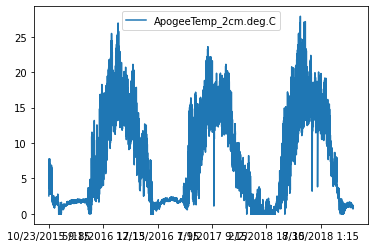

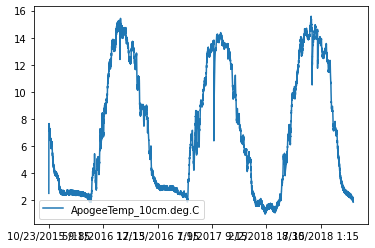

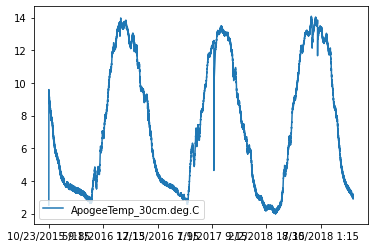

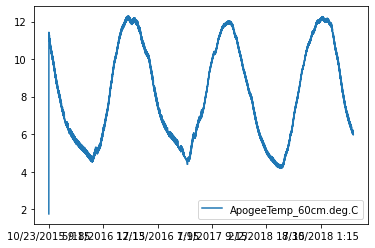

In [6]:
#Plot Apogee Temp

plt.show()
df.plot(use_index=True, y='ApogeeTemp_2cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_10cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_30cm.deg.C')
df.plot(use_index=True, y='ApogeeTemp_60cm.deg.C')


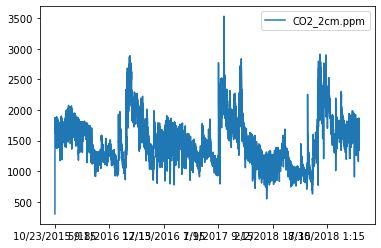

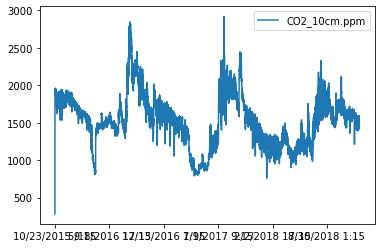

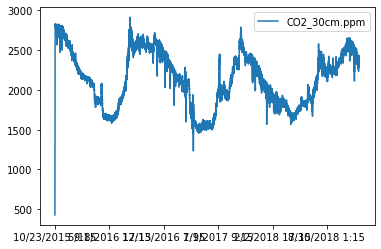

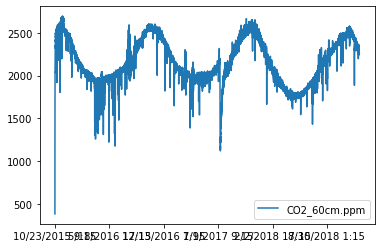

In [7]:
#Plot CO2 

plt.show()
df.plot(use_index=True, y='CO2_2cm.ppm')
df.plot(use_index=True, y='CO2_10cm.ppm')
df.plot(use_index=True, y='CO2_30cm.ppm')
df.plot(use_index=True, y='CO2_60cm.ppm')



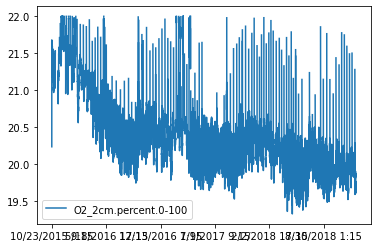

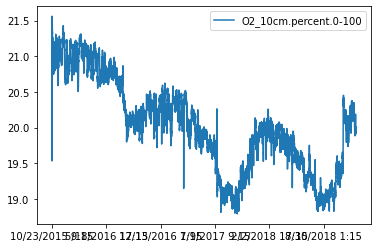

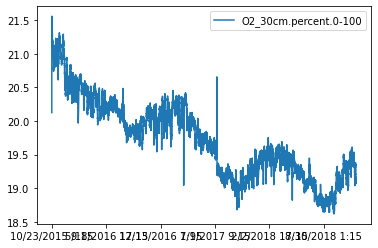

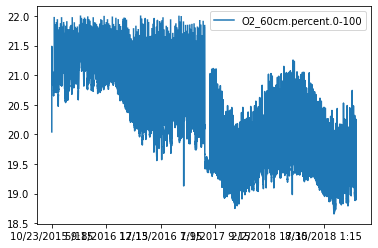

In [8]:
#Plot O2
df['O2_2cm.percent.0-100'].mask(df['O2_2cm.percent.0-100']>=22, inplace=True)
df['O2_60cm.percent.0-100'].mask(df['O2_60cm.percent.0-100']>=22, inplace=True)


plt.show()
df.plot(use_index=True, y='O2_2cm.percent.0-100')
df.plot(use_index=True, y='O2_10cm.percent.0-100')
df.plot(use_index=True, y='O2_30cm.percent.0-100')
df.plot(use_index=True, y='O2_60cm.percent.0-100')


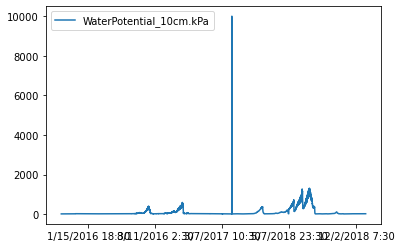

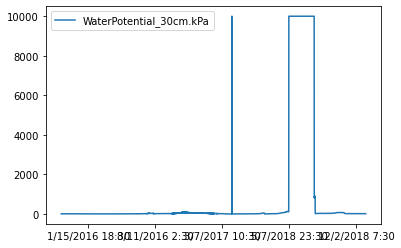

In [9]:
#Water potential has negative values, which I have masked out of the df. 
#I am thinking of taking the absolute value before masking the df.

plt.show()
df.plot(use_index=True, y='WaterPotential_10cm.kPa')
df.plot(use_index=True, y='WaterPotential_30cm.kPa')

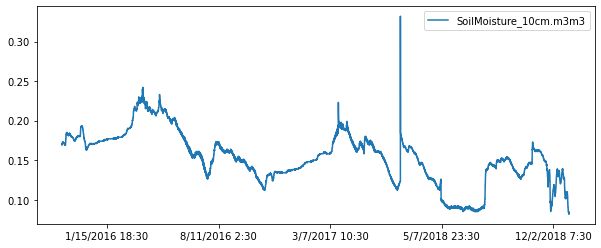

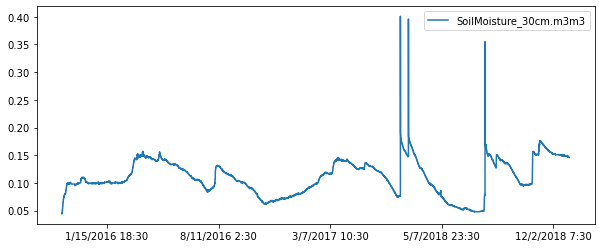

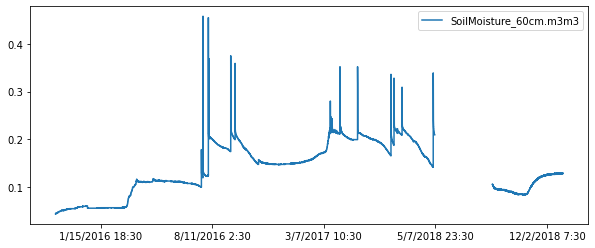

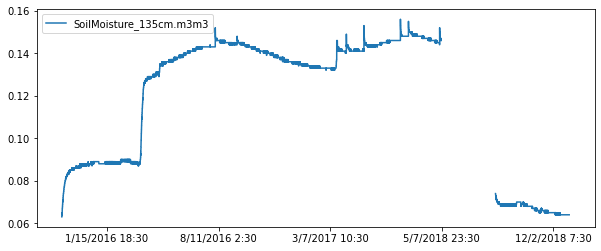

In [10]:
#Plot Soil Moisture


plt.show()

df.plot(use_index=True, y='SoilMoisture_10cm.m3m3', figsize=(10,4))


df.plot(use_index=True, y='SoilMoisture_30cm.m3m3', figsize=(10,4))


df.plot(use_index=True, y='SoilMoisture_60cm.m3m3', figsize=(10,4))


df.plot(use_index=True, y='SoilMoisture_135cm.m3m3', figsize=(10,4))




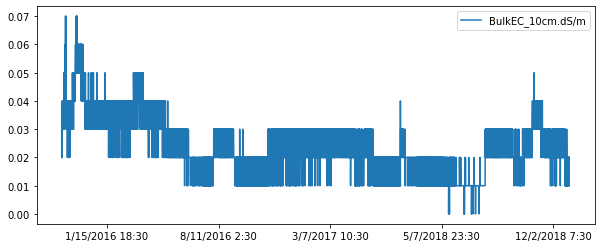

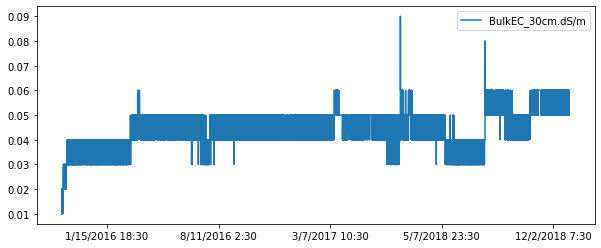

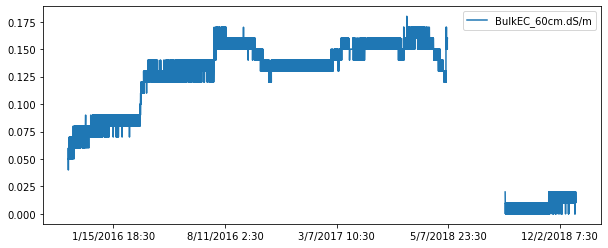

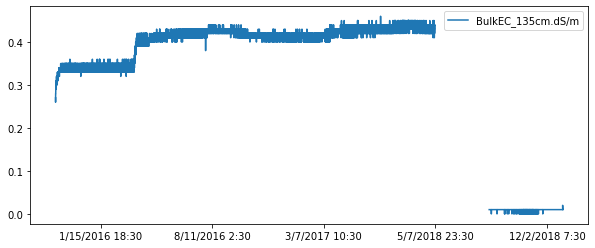

In [11]:
#Plot Bulk EC

plt.show()
df.plot(use_index=True, y='BulkEC_10cm.dS/m', figsize=(10,4))

df.plot(use_index=True, y='BulkEC_30cm.dS/m', figsize=(10,4))

df.plot(use_index=True, y='BulkEC_60cm.dS/m', figsize=(10,4))

df.plot(use_index=True, y='BulkEC_135cm.dS/m', figsize=(10,4))


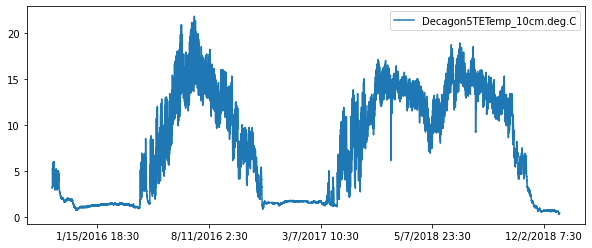

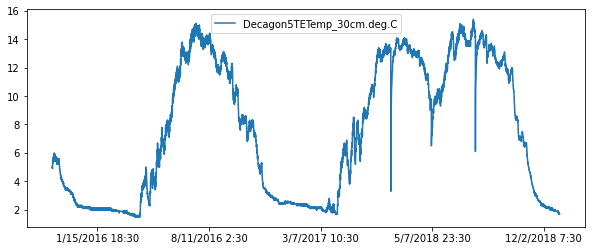

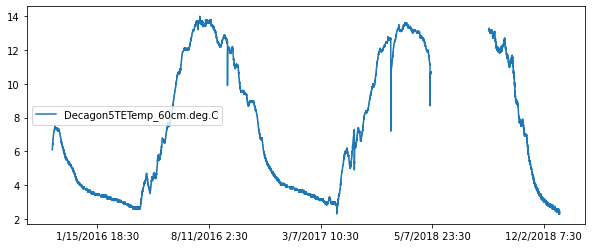

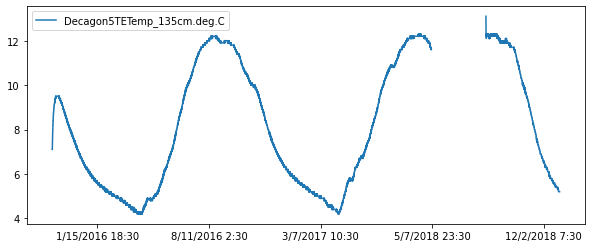

In [12]:
#Plot Decagon5TE Temps

plt.show()
df.plot(use_index=True, y='Decagon5TETemp_10cm.deg.C', figsize=(10,4))

df.plot(use_index=True, y='Decagon5TETemp_30cm.deg.C', figsize=(10,4))

df.plot(use_index=True, y='Decagon5TETemp_60cm.deg.C', figsize=(10,4))

df.plot(use_index=True, y='Decagon5TETemp_135cm.deg.C', figsize=(10,4))




In [13]:
df=df.drop(columns='Decagon5TETemp_10cm.deg.C')
df=df.drop(columns='Decagon5TETemp_30cm.deg.C')
df=df.drop(columns='Decagon5TETemp_60cm.deg.C')
df=df.drop(columns='Decagon5TETemp_135cm.deg.C')


In [14]:
output=df.copy()
today = dt.date.today()
outfile = '../../processed_data/Catalina-Jemez/Green_Pit2_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [15]:
output

,ApogeeTemp_2cm.deg.C,ApogeeTemp_10cm.deg.C,ApogeeTemp_30cm.deg.C,ApogeeTemp_60cm.deg.C,O2_2cm.percent.0-100,O2_10cm.percent.0-100,O2_30cm.percent.0-100,O2_60cm.percent.0-100,CO2_2cm.ppm,CO2_10cm.ppm,...,DecagonMPS6Temp_30cm.deg.C,SoilMoisture_10cm.m3m3,SoilMoisture_30cm.m3m3,SoilMoisture_60cm.m3m3,SoilMoisture_135cm.m3m3,BulkEC_10cm.dS/m,BulkEC_30cm.dS/m,BulkEC_60cm.dS/m,BulkEC_135cm.dS/m,PRISM_precip.mm
10/23/2015 9:15,2.532,2.504,2.511,1.749,20.236,20.127,20.124,20.042,304.090,281.311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/23/2015 9:30,2.731,2.743,2.796,2.006,21.679,21.560,21.556,21.486,324.249,299.842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/23/2015 9:45,2.818,2.882,3.010,2.271,21.672,21.550,21.542,21.472,322.350,300.113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/23/2015 10:00,3.031,3.135,3.395,2.735,21.645,21.480,21.514,21.483,320.904,294.509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10/23/2015 10:15,3.698,3.800,3.927,4.075,NaN,19.753,21.519,21.485,314.396,294.328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.25
2018-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.33
2018-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.19
2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
